In [36]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from scipy.integrate import quad

In [27]:
#ques1


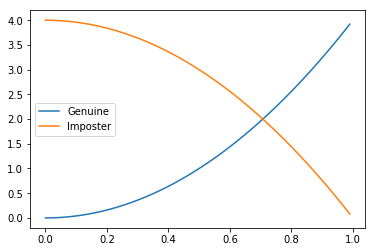

In [28]:
#ques2,3
s = np.arange(0,1,0.01)
genuine = 4 * s * s
imposter = 4 - 4 * s * s
plt.plot(s,genuine,label="Genuine")
plt.plot(s,imposter,label="Imposter")
plt.legend()

Text(0,0.5,'True Positive Rate')

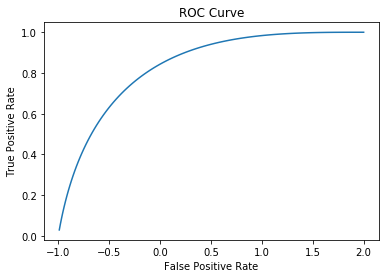

In [29]:
tpr = []
fpr = []
for s in np.arange(0,1,0.01):
    tpr.append((4/3) * (1 - s*s*s))
    fpr.append((8/3) - (4*s - (4/3)*s*s*s))
plt.title("ROC Curve")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

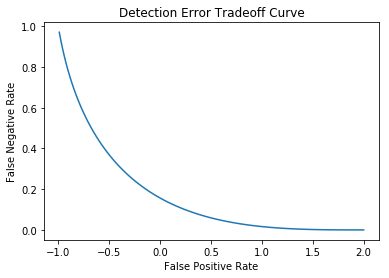

In [30]:
fpr = []
fnr = []
for s in np.arange(0,1,0.01):
    fpr.append((8/3) - (4*s - (4/3)*s*s*s))
    fnr.append((4/3)*s*s*s)
plt.title("Detection Error Tradeoff Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("False Negative Rate")
plt.plot(fpr,fnr)

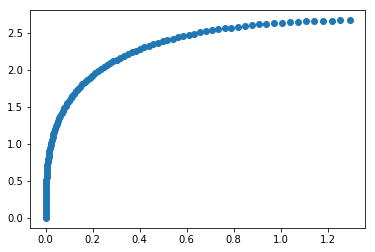

In [31]:
#ques4
#det curve

y = []
x = []
for i in range(0,100):
    s = i/100.0
    y.append(4*s - 4* s**3/3)
    x.append(4* s**3/3)
fig = plt.plot(figsize = (20,20))
plt.scatter(x,y)

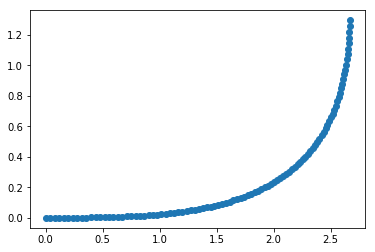

In [32]:
y = []
x = []
for i in range(0,100):
    s = i/100.0
    y.append(4*s - 4* s**3/3)
    x.append(4* s**3/3)
fig = plt.plot(figsize = (20,20))
plt.scatter(y,x)

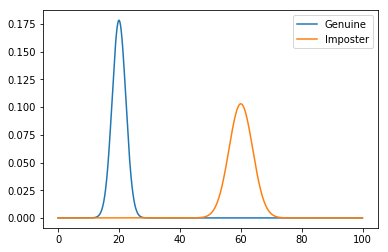

In [33]:
s = np.arange(0, 100, 0.1)
genuine = stats.norm.pdf(s, 20, math.sqrt(5))
imposter = stats.norm.pdf(s, 60, math.sqrt(15))
plt.plot(s, genuine, label="Genuine")
plt.plot(s, imposter, label="Imposter")
plt.legend()

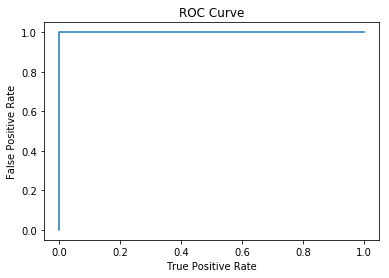

In [37]:
genuine_sigma = math.sqrt(5)
genuine_mean = 20
imposter_mean = 60
imposter_sigma = math.sqrt(15)

def integrand_genuine(x):
    ans = (1/(math.sqrt(2*math.pi)*genuine_sigma)) * (math.exp((-1/(2*(genuine_sigma**2))) * ((x - genuine_mean) ** 2)))
    return ans
    
def integrand_imposter(x):
    ans = (1/(math.sqrt(2*math.pi)*imposter_sigma)) * (math.exp((-1/(2*(imposter_sigma**2))) * ((x - imposter_mean) ** 2)))
    return ans

tpr = []
fpr = []
for s in np.arange(0,100,0.1):
    tpr.append(quad(integrand_genuine,s,float('inf'))[0])
    fpr.append(quad(integrand_imposter,s,float('inf'))[0])
plt.title("ROC Curve")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.plot(tpr, fpr)

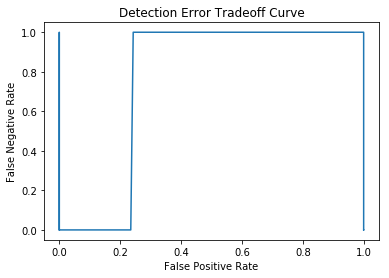

In [40]:
fpr = []
fnr = []
for s in np.arange(0,100,0.1):
    fpr.append(quad(integrand_imposter,s,float('inf'))[0])
    fnr.append(quad(integrand_genuine,-float('inf'),s)[0])
plt.title("Detection Error Tradeoff Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("False Negative Rate")
plt.plot(fpr,fnr)